In [106]:
import json
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt


In [39]:
with open('modified_data.json') as f:
    data = json.loads(f.read())

rows = []

for university in data['University']:
    row = {}
    row['University name'] = university['name']
    row['Total students'] = university.get('Student and Staff', {}).get('Total students', 'N/A')
    row['International students'] = university.get('Student and Staff', {}).get('International students', 'N/A')
    row['Total faculty staff'] = university.get('Student and Staff', {}).get('Total faculty staff', 'N/A')

    for admission_type, admission in university['Admission'].items():
        if admission_type == 'General':
            row['GMAT'] = admission.get('GMAT', 'N/A')
            row['IELTS'] = admission.get('IELTS', 'N/A')
            row['TOEFL'] = admission.get('TOEFL', 'N/A')
        elif admission_type == 'Bachelor':
            row['SAT'] = admission.get('SAT', 'N/A')
            row['TOEFL'] = admission.get('TOEFL', 'N/A')
        elif admission_type == 'Master':
            # row['GMAT'] = admission.get('GMAT', 'N/A')
            row['GPA'] = admission.get('GPA', 'N/A')
            row['GRE'] = admission.get('GRE', 'N/A')
            row['SAT'] = admission.get('SAT', 'N/A')
            row['ATAR'] = admission.get('ATAR', 'N/A')
    rows.append(row)


In [40]:
df = pd.DataFrame(rows)
df

,University name,Total students,International students,Total faculty staff,GMAT,IELTS,TOEFL,SAT,GPA,GRE,ATAR
0,Massachusetts Institute of Technology (MIT),"11,035","3,627","2,919",728+,7+,100+,1520+,NaN,NaN,NaN
1,Harvard University,"21,877","5,379","4,480",610+,N/A,80+,1470+,NaN,NaN,NaN
2,University of Cambridge,"20,871","7,865","5,735",N/A,7+,100+,1460+,NaN,NaN,NaN
3,University of Oxford,"21,972","9,024","6,650",N/A,7+,100+,1470+,NaN,NaN,NaN
4,Stanford University,"14,518","3,318","4,694",600+,N/A,101+,1420+,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
498,Universität Regensburg,"20,539","1,705","3,252",NaN,NaN,NaN,NaN,NaN,NaN,NaN
499,"Université de Savoie, Chambery, Annecy",N/A,N/A,N/A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
500,Wayne State University,"21,139","1,058","2,530",530+,6+,79+,1060+,NaN,NaN,NaN
501,Wroclaw University of Science and Technology (...,"22,967","1,054","2,105",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
df.to_csv('university_info_data.csv')
df

,University name,Total students,International students,Total faculty staff,GMAT,IELTS,TOEFL,SAT,GPA,GRE,ATAR
0,Massachusetts Institute of Technology (MIT),"11,035","3,627","2,919",728+,7+,100+,1520+,NaN,NaN,NaN
1,Harvard University,"21,877","5,379","4,480",610+,N/A,80+,1470+,NaN,NaN,NaN
2,University of Cambridge,"20,871","7,865","5,735",N/A,7+,100+,1460+,NaN,NaN,NaN
3,University of Oxford,"21,972","9,024","6,650",N/A,7+,100+,1470+,NaN,NaN,NaN
4,Stanford University,"14,518","3,318","4,694",600+,N/A,101+,1420+,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
498,Universität Regensburg,"20,539","1,705","3,252",NaN,NaN,NaN,NaN,NaN,NaN,NaN
499,"Université de Savoie, Chambery, Annecy",N/A,N/A,N/A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
500,Wayne State University,"21,139","1,058","2,530",530+,6+,79+,1060+,NaN,NaN,NaN
501,Wroclaw University of Science and Technology (...,"22,967","1,054","2,105",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
df1 = pd.read_csv('QS_World_University_Rankings_by_Subject_2022_Natural_Sciences.csv')

# Select the desired columns from the first CSV file
columns_to_copy = df1[['World Rank', 'City', 'Country']]

# Read in the second CSV file
df2 = pd.read_csv('university_info_data.csv')

# Concatenate the columns from the first CSV file with the second CSV file
result = pd.concat([df2, columns_to_copy], axis=1)

In [43]:
result

,Unnamed: 0,University name,Total students,International students,Total faculty staff,GMAT,IELTS,TOEFL,SAT,GPA,GRE,ATAR,World Rank,City,Country
0,0,Massachusetts Institute of Technology (MIT),"11,035","3,627","2,919",728+,7+,100+,1520+,NaN,NaN,NaN,1,Cambridge,United States
1,1,Harvard University,"21,877","5,379","4,480",610+,NaN,80+,1470+,NaN,NaN,NaN,2,Cambridge,United States
2,2,University of Cambridge,"20,871","7,865","5,735",NaN,7+,100+,1460+,NaN,NaN,NaN,3,Cambridge,United Kingdom
3,3,University of Oxford,"21,972","9,024","6,650",NaN,7+,100+,1470+,NaN,NaN,NaN,4,Oxford,United Kingdom
4,4,Stanford University,"14,518","3,318","4,694",600+,NaN,101+,1420+,NaN,NaN,NaN,5,Stanford,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,498,Universität Regensburg,"20,539","1,705","3,252",NaN,NaN,NaN,NaN,NaN,NaN,NaN,451-500,Regensburg,Germany
499,499,"Université de Savoie, Chambery, Annecy",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,451-500,Annecy,France
500,500,Wayne State University,"21,139","1,058","2,530",530+,6+,79+,1060+,NaN,NaN,NaN,451-500,Detroit,United States
501,501,Wroclaw University of Science and Technology (...,"22,967","1,054","2,105",NaN,NaN,NaN,NaN,NaN,NaN,NaN,451-500,Wroclaw,Poland


In [65]:

result = result.reindex(columns=['World Rank', 'University name','City', 'Country', 'GMAT', 'IELTS', 'TOEFL', 'SAT', 'GRE', 'GPA', 'Total faculty staff', 'International students','Total students'])

In [66]:
result

,World Rank,University name,City,Country,GMAT,IELTS,TOEFL,SAT,GRE,GPA,Total faculty staff,International students,Total students
0,1,Massachusetts Institute of Technology (MIT),Cambridge,United States,728+,7+,100+,1520+,NaN,NaN,"2,919","3,627","11,035"
1,2,Harvard University,Cambridge,United States,610+,NaN,80+,1470+,NaN,NaN,"4,480","5,379","21,877"
2,3,University of Cambridge,Cambridge,United Kingdom,NaN,7+,100+,1460+,NaN,NaN,"5,735","7,865","20,871"
3,4,University of Oxford,Oxford,United Kingdom,NaN,7+,100+,1470+,NaN,NaN,"6,650","9,024","21,972"
4,5,Stanford University,Stanford,United States,600+,NaN,101+,1420+,NaN,NaN,"4,694","3,318","14,518"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,451-500,Universität Regensburg,Regensburg,Germany,NaN,NaN,NaN,NaN,NaN,NaN,"3,252","1,705","20,539"
499,451-500,"Université de Savoie, Chambery, Annecy",Annecy,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
500,451-500,Wayne State University,Detroit,United States,530+,6+,79+,1060+,NaN,NaN,"2,530","1,058","21,139"
501,451-500,Wroclaw University of Science and Technology (...,Wroclaw,Poland,NaN,NaN,NaN,NaN,NaN,NaN,"2,105","1,054","22,967"


In [67]:
result.to_csv('university_info_data.csv')

## Data preprocessing

In [68]:
df = pd.read_csv('university_info_data.csv')

In [69]:
df

,Unnamed: 0,World Rank,University name,City,Country,GMAT,IELTS,TOEFL,SAT,GRE,GPA,Total faculty staff,International students,Total students
0,0,1,Massachusetts Institute of Technology (MIT),Cambridge,United States,728+,7+,100+,1520+,NaN,NaN,"2,919","3,627","11,035"
1,1,2,Harvard University,Cambridge,United States,610+,NaN,80+,1470+,NaN,NaN,"4,480","5,379","21,877"
2,2,3,University of Cambridge,Cambridge,United Kingdom,NaN,7+,100+,1460+,NaN,NaN,"5,735","7,865","20,871"
3,3,4,University of Oxford,Oxford,United Kingdom,NaN,7+,100+,1470+,NaN,NaN,"6,650","9,024","21,972"
4,4,5,Stanford University,Stanford,United States,600+,NaN,101+,1420+,NaN,NaN,"4,694","3,318","14,518"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,498,451-500,Universität Regensburg,Regensburg,Germany,NaN,NaN,NaN,NaN,NaN,NaN,"3,252","1,705","20,539"
499,499,451-500,"Université de Savoie, Chambery, Annecy",Annecy,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
500,500,451-500,Wayne State University,Detroit,United States,530+,6+,79+,1060+,NaN,NaN,"2,530","1,058","21,139"
501,501,451-500,Wroclaw University of Science and Technology (...,Wroclaw,Poland,NaN,NaN,NaN,NaN,NaN,NaN,"2,105","1,054","22,967"


In [71]:
df = df.drop('Unnamed: 0', axis=1)

In [72]:
df.to_csv('university_info_data.csv')

In [27]:
df.count

<bound method DataFrame.count of      Unnamed: 0 World Rank                                    University name  \
0             0          1        Massachusetts Institute of Technology (MIT)   
1             1          2                                 Harvard University   
2             2          3                            University of Cambridge   
3             3          4                               University of Oxford   
4             4          5                                Stanford University   
..          ...        ...                                                ...   
498         498    451-500                             Universität Regensburg   
499         499    451-500             Université de Savoie, Chambery, Annecy   
500         500    451-500                             Wayne State University   
501         501    451-500  Wroclaw University of Science and Technology (...   
502         502    451-500                                    York Universit

In [73]:
df.dtypes

World Rank                object
University name           object
City                      object
Country                   object
GMAT                      object
IELTS                     object
TOEFL                     object
SAT                       object
GRE                       object
GPA                       object
Total faculty staff       object
International students    object
Total students            object
dtype: object

In [75]:
df['Total faculty staff'] = df['Total faculty staff'].str.replace(',','').astype(float)
df['International students'] = df['International students'].str.replace(',','').astype(float)
df['Total students'] = df['Total students'].str.replace(',','').astype(float)

In [76]:
df.dtypes

World Rank                 object
University name            object
City                       object
Country                    object
GMAT                       object
IELTS                      object
TOEFL                      object
SAT                        object
GRE                        object
GPA                        object
Total faculty staff       float64
International students    float64
Total students            float64
dtype: object

In [77]:
df

,World Rank,University name,City,Country,GMAT,IELTS,TOEFL,SAT,GRE,GPA,Total faculty staff,International students,Total students
0,1,Massachusetts Institute of Technology (MIT),Cambridge,United States,728+,7+,100+,1520+,NaN,NaN,2919.0,3627.0,11035.0
1,2,Harvard University,Cambridge,United States,610+,NaN,80+,1470+,NaN,NaN,4480.0,5379.0,21877.0
2,3,University of Cambridge,Cambridge,United Kingdom,NaN,7+,100+,1460+,NaN,NaN,5735.0,7865.0,20871.0
3,4,University of Oxford,Oxford,United Kingdom,NaN,7+,100+,1470+,NaN,NaN,6650.0,9024.0,21972.0
4,5,Stanford University,Stanford,United States,600+,NaN,101+,1420+,NaN,NaN,4694.0,3318.0,14518.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,451-500,Universität Regensburg,Regensburg,Germany,NaN,NaN,NaN,NaN,NaN,NaN,3252.0,1705.0,20539.0
499,451-500,"Université de Savoie, Chambery, Annecy",Annecy,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
500,451-500,Wayne State University,Detroit,United States,530+,6+,79+,1060+,NaN,NaN,2530.0,1058.0,21139.0
501,451-500,Wroclaw University of Science and Technology (...,Wroclaw,Poland,NaN,NaN,NaN,NaN,NaN,NaN,2105.0,1054.0,22967.0


In [81]:
df['GMAT'] = pd.to_numeric(df['GMAT'].str.replace('+',''), errors='coerce')
df['IELTS'] = pd.to_numeric(df['IELTS'].str.replace('+',''), errors='coerce')
df['TOEFL'] = pd.to_numeric(df['TOEFL'].str.replace('+',''), errors='coerce')
df['SAT'] = pd.to_numeric(df['SAT'].str.replace('+',''), errors='coerce')
df['GRE'] = pd.to_numeric(df['GRE'].str.replace('+',''), errors='coerce')
df['GPA'] = pd.to_numeric(df['GPA'].str.replace('+',''), errors='coerce')

C:\Users\akibi\AppData\Local\Temp\ipykernel_4040\2282186042.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['GMAT'] = pd.to_numeric(df['GMAT'].str.replace('+',''), errors='coerce')
C:\Users\akibi\AppData\Local\Temp\ipykernel_4040\2282186042.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['IELTS'] = pd.to_numeric(df['IELTS'].str.replace('+',''), errors='coerce')
C:\Users\akibi\AppData\Local\Temp\ipykernel_4040\2282186042.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['TOEFL'] = pd.to_numeric(df['TOEF

In [82]:
df

,World Rank,University name,City,Country,GMAT,IELTS,TOEFL,SAT,GRE,GPA,Total faculty staff,International students,Total students
0,1,Massachusetts Institute of Technology (MIT),Cambridge,United States,728.0,7.0,100.0,1520.0,NaN,NaN,2919.0,3627.0,11035.0
1,2,Harvard University,Cambridge,United States,610.0,NaN,80.0,1470.0,NaN,NaN,4480.0,5379.0,21877.0
2,3,University of Cambridge,Cambridge,United Kingdom,NaN,7.0,100.0,1460.0,NaN,NaN,5735.0,7865.0,20871.0
3,4,University of Oxford,Oxford,United Kingdom,NaN,7.0,100.0,1470.0,NaN,NaN,6650.0,9024.0,21972.0
4,5,Stanford University,Stanford,United States,600.0,NaN,101.0,1420.0,NaN,NaN,4694.0,3318.0,14518.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,451-500,Universität Regensburg,Regensburg,Germany,NaN,NaN,NaN,NaN,NaN,NaN,3252.0,1705.0,20539.0
499,451-500,"Université de Savoie, Chambery, Annecy",Annecy,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
500,451-500,Wayne State University,Detroit,United States,530.0,6.0,79.0,1060.0,NaN,NaN,2530.0,1058.0,21139.0
501,451-500,Wroclaw University of Science and Technology (...,Wroclaw,Poland,NaN,NaN,NaN,NaN,NaN,NaN,2105.0,1054.0,22967.0


In [83]:
df.dtypes

World Rank                 object
University name            object
City                       object
Country                    object
GMAT                      float64
IELTS                     float64
TOEFL                     float64
SAT                       float64
GRE                       float64
GPA                       float64
Total faculty staff       float64
International students    float64
Total students            float64
dtype: object

In [84]:
df.isnull().sum()

World Rank                  0
University name             0
City                        6
Country                     0
GMAT                      372
IELTS                     299
TOEFL                     297
SAT                       343
GRE                       487
GPA                       437
Total faculty staff         7
International students      7
Total students              7
dtype: int64

In [86]:
df['GMAT'].isnull().sum()

372

In [87]:
# replace the null values with the mean 
df['GMAT'].fillna(df['GMAT'].mean(), inplace=True)

In [89]:
df['GMAT']

0      728.000000
1      610.000000
2      597.198473
3      597.198473
4      600.000000
          ...    
498    597.198473
499    597.198473
500    530.000000
501    597.198473
502    550.000000
Name: GMAT, Length: 503, dtype: float64

In [93]:
df['IELTS'].fillna(df['IELTS'].median(), inplace=True)
df['TOEFL'].fillna(df['TOEFL'].mean(), inplace=True)
df['SAT'].fillna(df['SAT'].mean(), inplace=True)
df['GRE'].fillna(df['GRE'].mean(), inplace=True)
df['GPA'].fillna(df['GPA'].median(), inplace=True)

In [94]:
df.isnull().sum()

World Rank                0
University name           0
City                      6
Country                   0
GMAT                      0
IELTS                     0
TOEFL                     0
SAT                       0
GRE                       0
GPA                       0
Total faculty staff       7
International students    7
Total students            7
dtype: int64

In [95]:
df

,World Rank,University name,City,Country,GMAT,IELTS,TOEFL,SAT,GRE,GPA,Total faculty staff,International students,Total students
0,1,Massachusetts Institute of Technology (MIT),Cambridge,United States,728.000000,7.0,100.000000,1520.000,308.125,3.0,2919.0,3627.0,11035.0
1,2,Harvard University,Cambridge,United States,610.000000,6.0,80.000000,1470.000,308.125,3.0,4480.0,5379.0,21877.0
2,3,University of Cambridge,Cambridge,United Kingdom,597.198473,7.0,100.000000,1460.000,308.125,3.0,5735.0,7865.0,20871.0
3,4,University of Oxford,Oxford,United Kingdom,597.198473,7.0,100.000000,1470.000,308.125,3.0,6650.0,9024.0,21972.0
4,5,Stanford University,Stanford,United States,600.000000,6.0,101.000000,1420.000,308.125,3.0,4694.0,3318.0,14518.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,451-500,Universität Regensburg,Regensburg,Germany,597.198473,6.0,84.330097,1227.675,308.125,3.0,3252.0,1705.0,20539.0
499,451-500,"Université de Savoie, Chambery, Annecy",Annecy,France,597.198473,6.0,84.330097,1227.675,308.125,3.0,NaN,NaN,NaN
500,451-500,Wayne State University,Detroit,United States,530.000000,6.0,79.000000,1060.000,308.125,3.0,2530.0,1058.0,21139.0
501,451-500,Wroclaw University of Science and Technology (...,Wroclaw,Poland,597.198473,6.0,84.330097,1227.675,308.125,3.0,2105.0,1054.0,22967.0


In [98]:
df_gpa = df.sort_values(by=['GPA'], ascending=False)

In [99]:
df_gpa

,World Rank,University name,City,Country,GMAT,IELTS,TOEFL,SAT,GRE,GPA,Total faculty staff,International students,Total students
207,208,University of Canterbury | Te Whare Wānanga o ...,Christchurch,New Zealand,597.198473,6.0,80.000000,1227.675,308.125,6.0,880.0,2842.0,13541.0
0,1,Massachusetts Institute of Technology (MIT),Cambridge,United States,728.000000,7.0,100.000000,1520.000,308.125,3.0,2919.0,3627.0,11035.0
482,451-500,University College Cork,Cork,Ireland,597.198473,6.0,84.330097,1227.675,308.125,3.0,1592.0,3002.0,16235.0
323,322,Universidad Nacional de La Plata (UNLP),La Plata,Argentina,597.198473,6.0,84.330097,1227.675,308.125,3.0,5543.0,6976.0,57931.0
322,322,Tata Institute of Fundamental Research,Pune,India,597.198473,6.0,84.330097,1227.675,308.125,3.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,331,University of Otago,Dunedin,New Zealand,550.000000,6.0,80.000000,1190.000,308.125,2.0,1244.0,3222.0,19602.0
335,334,Kazan (Volga region) Federal University,Kazan,Russia,597.198473,5.0,84.330097,1227.675,308.125,2.0,3940.0,8495.0,22498.0
345,345,Universitat Politecnica de Valencia,València,Spain,597.198473,6.0,84.330097,1227.675,308.125,2.0,2049.0,2936.0,23606.0
358,357,Ural Federal University - UrFU,Ekaterinburg,Russia,597.198473,6.0,72.000000,1227.675,308.125,2.0,5369.0,5089.0,29939.0


In [121]:

df_usa = df[df['Country'] == 'United States']


df_int = df[df['International students'] > 10000]

In [122]:
df_usa

,World Rank,University name,City,Country,GMAT,IELTS,TOEFL,SAT,GRE,GPA,Total faculty staff,International students,Total students
0,1,Massachusetts Institute of Technology (MIT),Cambridge,United States,728.000000,7.0,100.0,1520.0,308.125,3.0,2919.0,3627.0,11035.0
1,2,Harvard University,Cambridge,United States,610.000000,6.0,80.0,1470.0,308.125,3.0,4480.0,5379.0,21877.0
4,5,Stanford University,Stanford,United States,600.000000,6.0,101.0,1420.0,308.125,3.0,4694.0,3318.0,14518.0
6,7,California Institute of Technology (Caltech),Pasadena,United States,597.198473,6.0,110.0,1520.0,308.125,3.0,969.0,683.0,2240.0
7,8,"University of California, Berkeley (UCB)",Berkeley,United States,690.000000,7.0,80.0,1340.0,308.125,3.0,3405.0,8989.0,40468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,451-500,The University of Alabama,Tuscaloosa,United States,500.000000,6.0,79.0,1060.0,308.125,3.0,1673.0,1091.0,33264.0
477,451-500,The University of Georgia,Athens,United States,610.000000,6.0,80.0,1320.0,308.125,3.0,2387.0,1647.0,36322.0
479,451-500,Tufts University,Medford,United States,640.000000,6.0,100.0,1410.0,308.125,3.0,1405.0,1787.0,11160.0
489,451-500,University of Kentucky,Lexington,United States,591.000000,6.0,71.0,1175.0,308.125,3.0,2207.0,1196.0,27329.0


In [123]:
df_int

,World Rank,University name,City,Country,GMAT,IELTS,TOEFL,SAT,GRE,GPA,Total faculty staff,International students,Total students
112,113,New York University (NYU),New York City,United States,660.0,7.0,100.0,1290.0,308.125,3.0,7386.0,11936.0,33331.0
242,241,University of Southern California,Los Angeles,United States,680.0,6.0,100.0,1360.0,308.125,3.0,3165.0,12224.0,44156.0


In [124]:
df_ielts = df[df['IELTS'] > 6]
df_ielts

,World Rank,University name,City,Country,GMAT,IELTS,TOEFL,SAT,GRE,GPA,Total faculty staff,International students,Total students
0,1,Massachusetts Institute of Technology (MIT),Cambridge,United States,728.000000,7.0,100.0,1520.000,308.125,3.0,2919.0,3627.0,11035.0
7,8,"University of California, Berkeley (UCB)",Berkeley,United States,690.000000,7.0,80.0,1340.000,308.125,3.0,3405.0,8989.0,40468.0
11,11,Princeton University,Princeton,United States,597.198473,7.0,100.0,1460.000,308.125,3.0,1066.0,1813.0,7767.0
17,18,"University of California, Los Angeles (UCLA)",Los Angeles,United States,680.000000,7.0,100.0,1370.000,308.125,3.0,4532.0,6647.0,45771.0
18,19,University of Chicago,Chicago,United States,610.000000,7.0,100.0,1020.000,308.125,3.0,2703.0,4442.0,16325.0
30,31,Yale University,New Haven,United States,690.000000,7.0,100.0,1450.000,308.125,3.0,5527.0,3118.0,11283.0
31,32,Cornell University,Ithaca,United States,650.000000,7.0,100.0,1390.000,308.125,3.0,2838.0,5015.0,23188.0
33,34,University of Michigan-Ann Arbor,Ann Arbor,United States,680.000000,7.0,100.0,1227.675,308.125,3.0,7132.0,7341.0,45651.0
34,35,Columbia University,New York City,United States,530.000000,7.0,100.0,1227.675,308.125,3.0,7401.0,8686.0,25914.0
35,36,"University of California, San Diego (UCSD)",San Diego,United States,668.000000,7.0,83.0,1390.000,308.125,3.0,4476.0,8184.0,38568.0


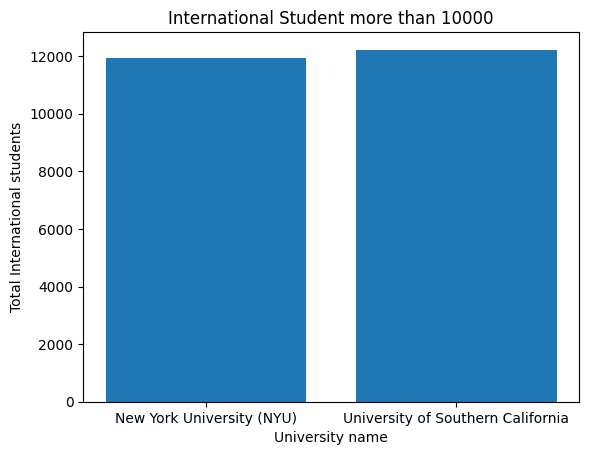

In [127]:
plt.bar(df_int['University name'], df_int['International students'])
plt.xlabel('University name')
plt.ylabel('Total International students')
plt.title('International Student more than 10000')
plt.show()

In [128]:
df.to_csv('final_uni_info.csv')